# Final Project, ROC curves of different classifiers
[Santander Customer Satisfaction](https://www.kaggle.com/c/santander-customer-satisfaction) research

## Load open source libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

## Load datasets

In [3]:
df_train = pd.read_csv("data/clean_train.csv")
df_train.shape

(76020, 308)

In [5]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


In [6]:
df_test = pd.read_csv("data/clean_test.csv")
df_test.shape

(75818, 307)

In [7]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40532.10
1,5,2,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45486.72
2,6,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46993.95
3,7,2,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,187898.61
4,9,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,73649.73


In [31]:
# train dataset
y = df_train['TARGET']
X = df_train.drop(['ID','TARGET'], axis=1)

# test dataset
test_id = df_test['ID']
test = df_test.drop(['ID'], axis=1)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, test.shape)

((60816, 306), (15204, 306), (75818, 306))


In [32]:
#Feature selection
sclf = ExtraTreesClassifier(n_estimators=50,max_depth=50)
selector = sclf.fit(X_train, y_train)
fs = SelectFromModel(selector, prefit=True)

X_train = fs.transform(X_train)
X_test = fs.transform(X_test)
test = fs.transform(test)

print(X_train.shape, X_test.shape, test.shape)

((60816, 61), (15204, 61), (75818, 61))


In [33]:
names = ["ExtraTreesClassifier","DecisionTreeClassifier","ExtraTreeClassifier","AdaBoostClassifier","GradientBoostingClassifier"]
clfs = [
ExtraTreesClassifier(n_estimators=100,max_depth=5),
DecisionTreeClassifier(max_depth=5),
ExtraTreeClassifier(max_depth=5),
AdaBoostClassifier(n_estimators=100),
GradientBoostingClassifier(n_estimators=100,max_depth=5)
]

('Roc AUC:ExtraTreesClassifier', 0.778858618439082)
('Roc AUC:DecisionTreeClassifier', 0.82858165223709446)
('Roc AUC:ExtraTreeClassifier', 0.71001996987278415)
('Roc AUC:AdaBoostClassifier', 0.84032851691523269)
('Roc AUC:GradientBoostingClassifier', 0.84808670318832857)


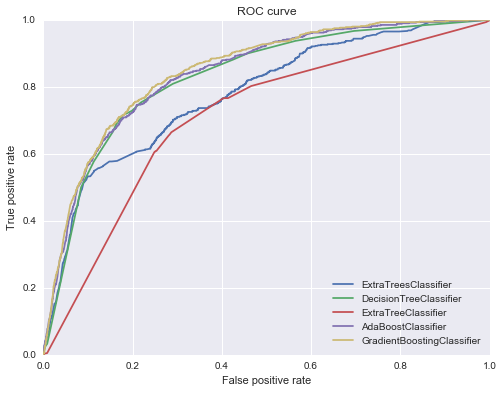

In [34]:
plt.figure(figsize=(8,6))
for name,clf in zip(names,clfs):
    clf.fit(X_train,y_train)
    y_proba = clf.predict_proba(X_test)[:,1]
    print ("ROC AUC: "+name, roc_auc_score(y_test, clf.predict_proba(X_test)[:,1],average='macro'))
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show() 